In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x0 = np.array(([0,0,1], [-1,1,1], [1,-1,1])).T
x1 = np.array(([2,2,1], [2,3,1], [3,2,1])).T

Initial weight is [[1.  0.  0.5]]


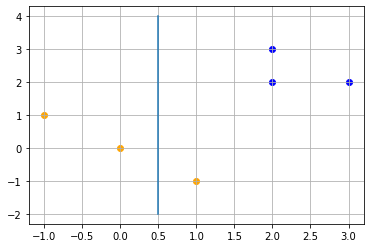

In [19]:
# Initialize the weights and bias
w = np.array([[1, 0, 0.5]])

# Print the initial weight
print("Initial weight is", w)

# Calculate the initial separating line
lx = np.array([-2, 4])
if w[0, 1] == 0:
    if w[0, 0] == 0:
        print("Not a line.")
    else:
        lx = np.array([w[0, 2]/w[0, 0], w[0, 2]/w[0, 0]])
        ly = np.array([-2, 4])
else:
    ly = (-w[0, 0]*lx-w[0, 2])/w[0, 1]

# Plot the initial separating line
plt.scatter(x0[0, :], x0[1, :], c='orange')
plt.scatter(x1[0, :], x1[1, :], c='blue')
if w[0, 1] != 0 or w[0, 0] != 0:
    plt.plot(lx, ly) 
plt.grid()
plt.show()

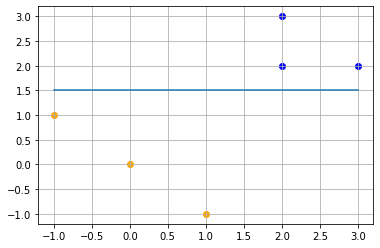

Final weight is [[ 0.   1.  -1.5]]
Training took 2 epochs.


In [20]:
# Train perceptron for a maximum of 10 epochs
max_epochs = 10
stopflag = False
for epoch in range(max_epochs):
    # Update weight vector based on misclassified points
    for i in range(3):
        if np.dot(w, x0[:, i]) > 0:
            w -= x0[:, i].T
            stopflag = False
    for i in range(3):
        if np.dot(w, x1[:, i]) <= 0:
            w += x1[:, i].T
            stopflag = False
    # Check if perceptron has correctly classified all points
    if stopflag:
        break
    stopflag = True
# Check if perceptron has learned a valid line
if w[0, 1] != 0 or w[0, 0] != 0:
    lx = np.array([-1, 3])
    ly = (-w[0, 0]*lx-w[0, 2])/w[0, 1]
    # Plot data and learned line
    fig = plt.figure()
    plt.scatter(x0[0, :], x0[1, :], c='orange')
    plt.scatter(x1[0, :], x1[1, :], c='blue')
    plt.plot(lx, ly)
    plt.grid()
    plt.show()
    # Print final weight and number of epochs
    print("Final weight is", w)
    print("Training took", epoch+1, "epochs.")
else:
    print("Not a line.")